# Step 1: Data Understanding

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATA SET

In [45]:
train=pd.read_csv('Titanic_train.csv')
test=pd.read_csv('Titanic_test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#train.head()

In [4]:
#Statistical Info
train.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Datatype Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

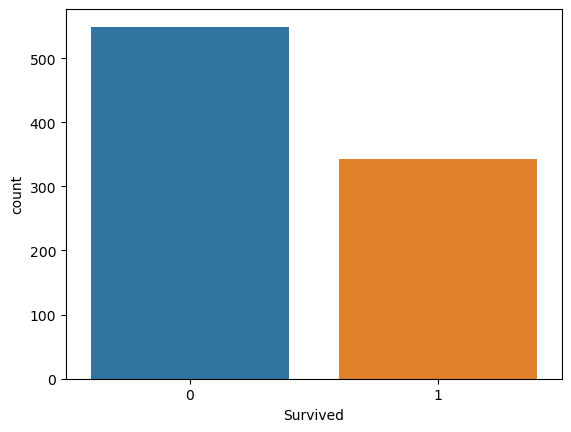

In [6]:
##Categorical Attribute
sns.countplot('Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

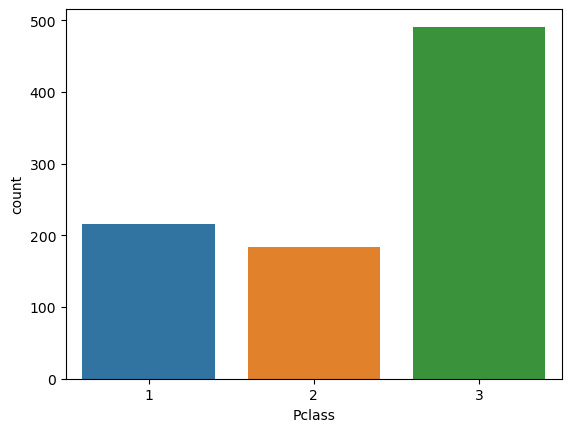

In [7]:
sns.countplot('Pclass',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

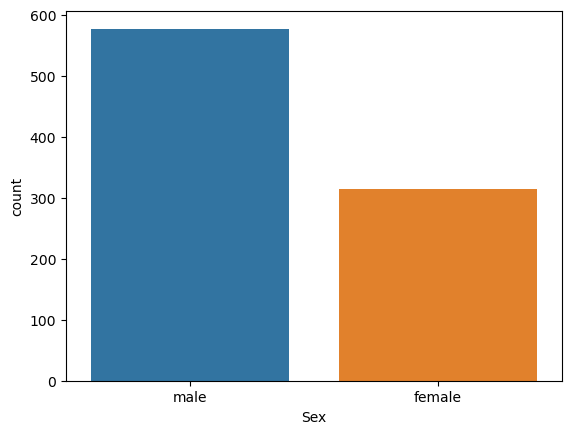

In [8]:
sns.countplot('Sex',data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

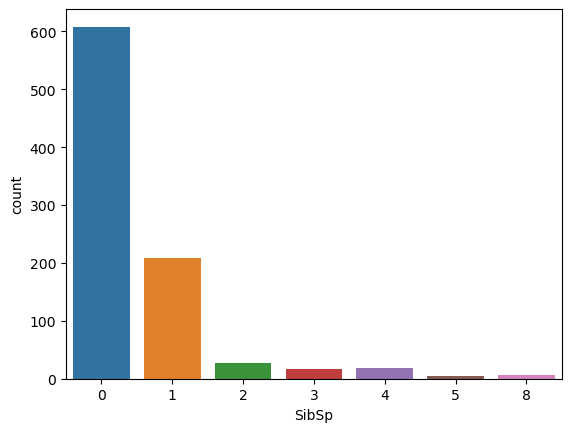

In [9]:
sns.countplot('SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

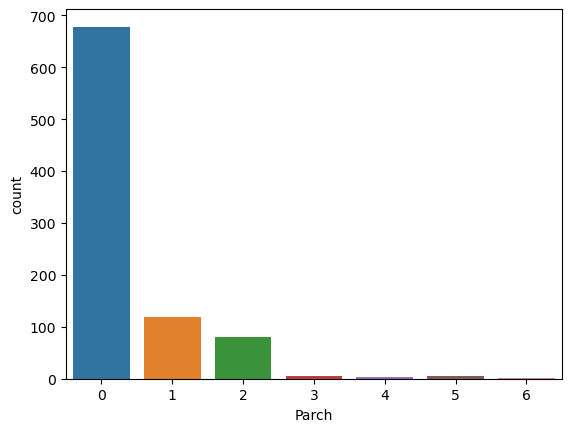

In [10]:
sns.countplot('Parch',data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

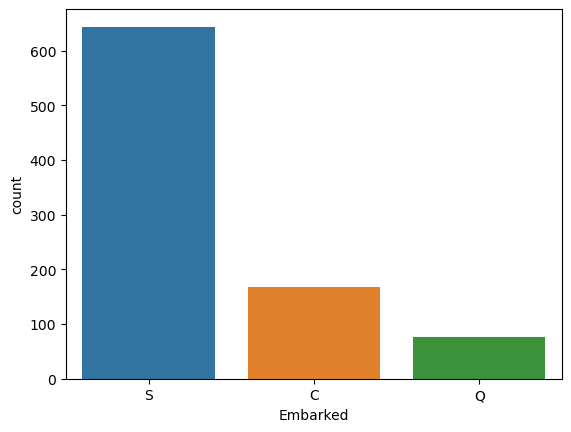

In [11]:
sns.countplot('Embarked',data=train)

In [12]:
#Nuemerical Attributes

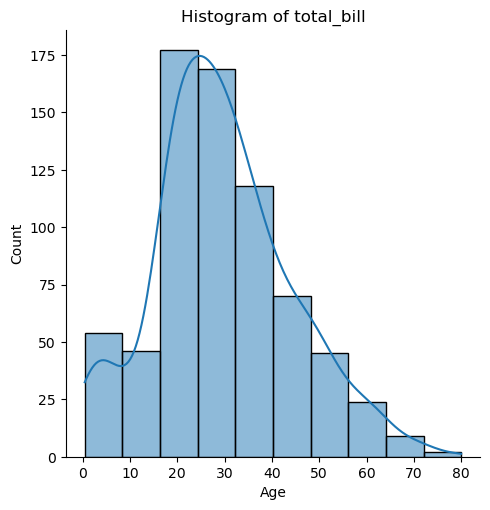

In [13]:
sns.displot(train['Age'],bins=10,kde=True)
plt.title("Histogram of total_bill")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

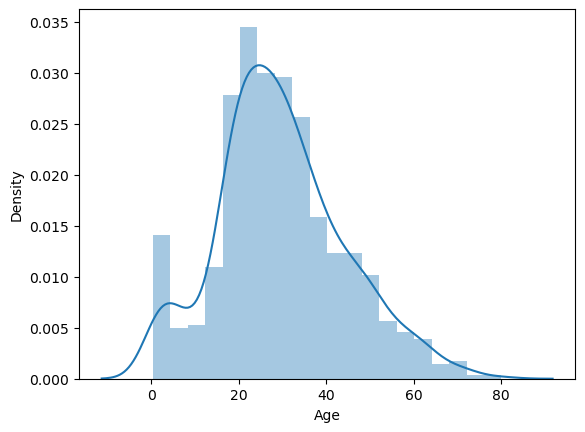

In [17]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

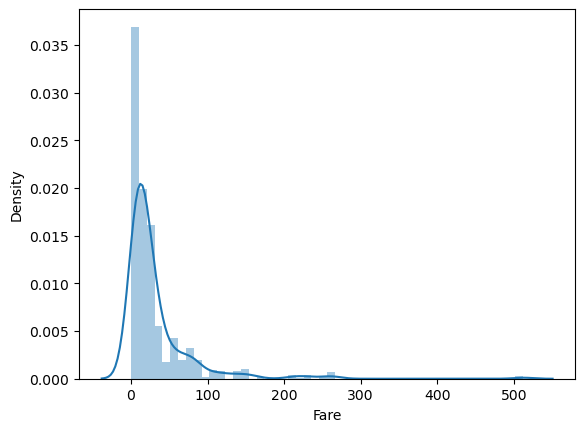

In [16]:
sns.distplot(train['Fare'])

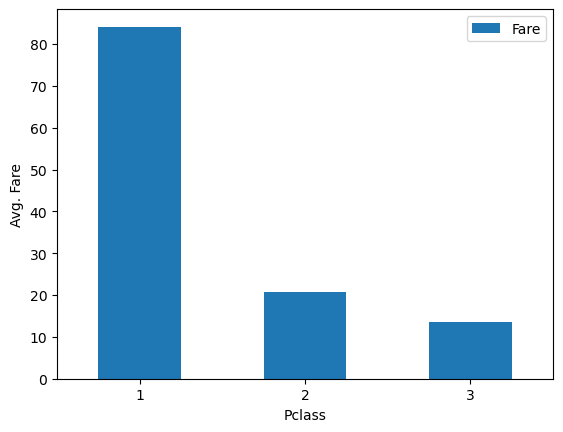

In [18]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()


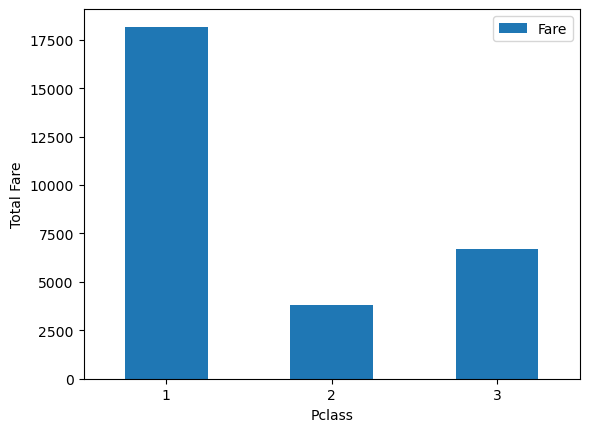

In [19]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

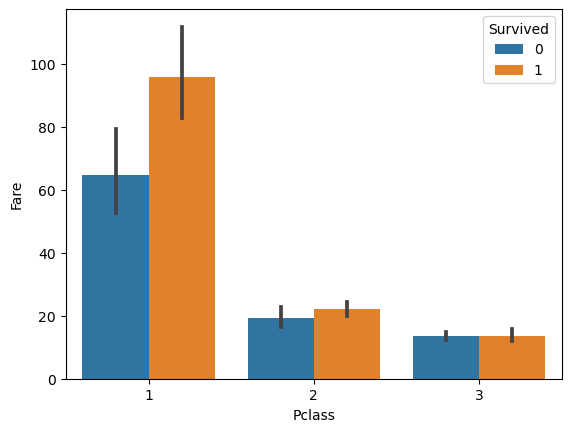

In [20]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

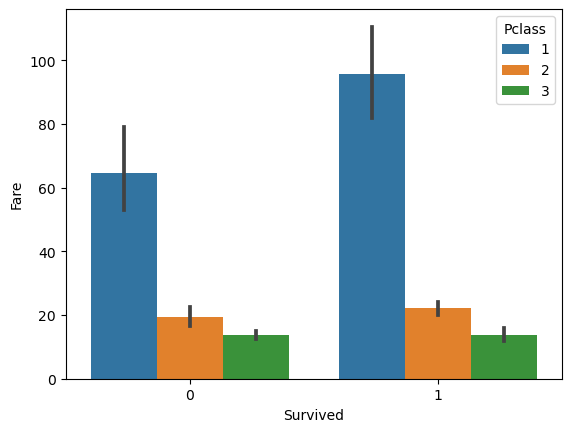

In [21]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

# Step 2: Data Preprocessing

In [22]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

# Find the null values

In [23]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [24]:
#Drop Cabin columns
df=df.drop(columns=['Cabin'],axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [25]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [ ]:
#Filling  missing values using mean of that numerical columns with mean()

In [27]:

df['Age'].mean()

29.881137667304014

In [29]:
#Fill missing vlaues using maen of the numerical column
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [ ]:
#Filling  missing values using mean of that categorical columns using mode

In [30]:
df['Embarked'].mode()[0]

'S'

In [31]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [32]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# Log Transformation for uniform data  distribution 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

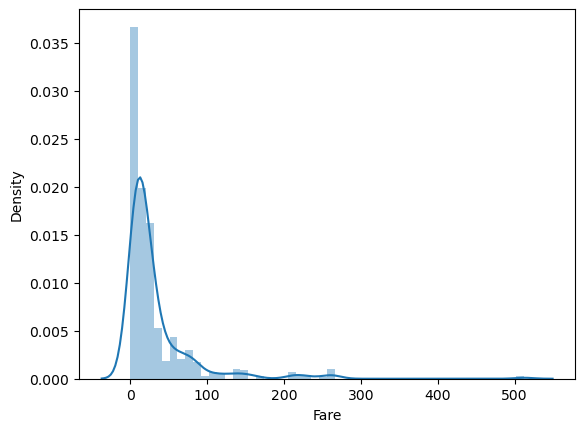

In [34]:
#sns.displot(df['Fare'],bins=10,kde=True)
#plt.title("Histogram of total_bill")
#plt.show()
sns.distplot(df['Fare'])

In [36]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

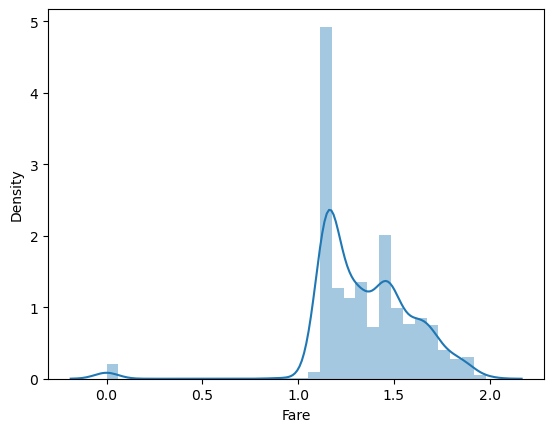

In [37]:
sns.distplot(df['Fare'])

In [ ]:
##Correlation matrix which input attributes effects the columns

<AxesSubplot:>

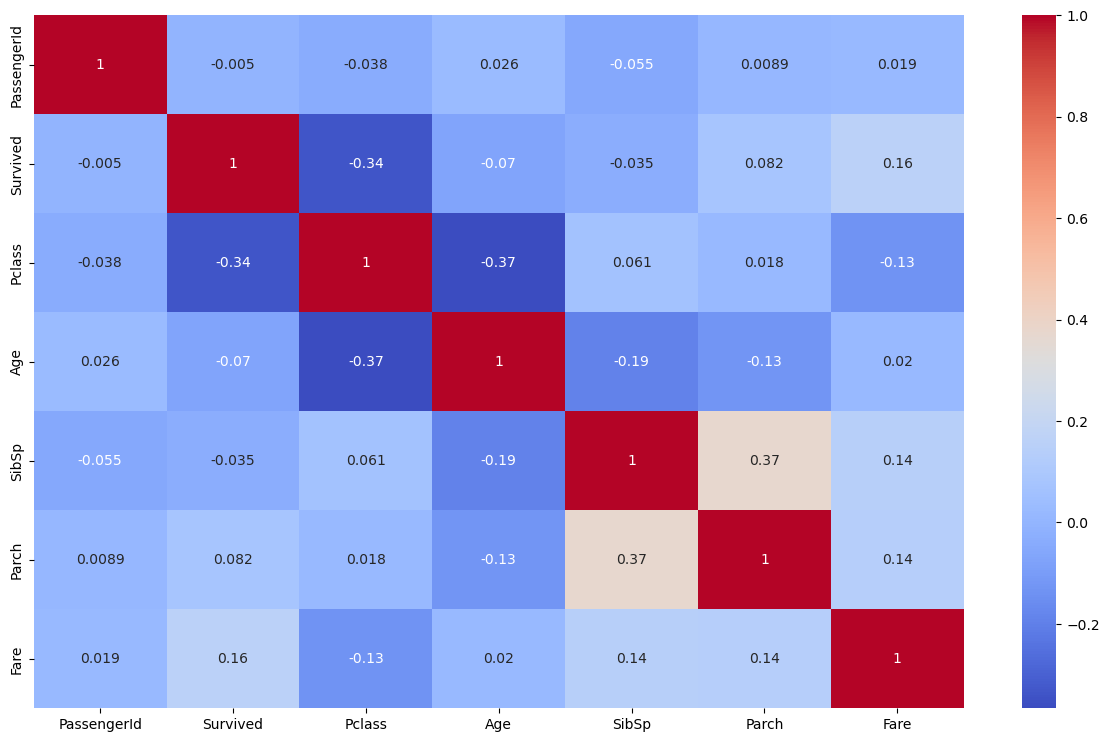

In [40]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head()

In [41]:
##Drop unnecessary columns
df=df.drop(columns=['Name','Ticket'],axis=1)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,0.135135,S
1,2,1.0,1,female,38.0,1,0,0.515239,C
2,3,1.0,3,female,26.0,0,0,0.156715,S
3,4,1.0,1,female,35.0,1,0,0.480945,S
4,5,0.0,3,male,35.0,0,0,0.160429,S


# Encoding

# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,0.135135,2
1,2,1.0,1,0,38.0,1,0,0.515239,0
2,3,1.0,3,0,26.0,0,0,0.156715,2
3,4,1.0,1,0,35.0,1,0,0.480945,2
4,5,0.0,3,1,35.0,0,0,0.160429,2


# Train-Test Split

In [46]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
#Input Split

In [47]:
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [48]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0.135135,2
1,1,0,38.0,1,0,0.515239,0
2,3,0,26.0,0,0,0.156715,2
3,1,0,35.0,1,0,0.480945,2
4,3,1,35.0,0,0,0.160429,2


# Step 3:Model Training

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.7912434875400163


In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.726457399103139
CV Score: 0.7665997112547862


In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.8159625886636119


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7937219730941704
CV Score: 0.7901512773837174


In [54]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


In [56]:
#from lightgbm import LGBMClassifier
#model = LGBMClassifier()
#classify(model)

In [63]:
#from catboost import CatBoostClassifier
#model = CatBoostClassifier(verbose=0)
#classify(model)

# Complete Model Training with Full data

In [64]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [65]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,0.153813,1
892,893,NaN,3,0,47.0,1,0,0.126411,2
893,894,NaN,2,1,62.0,0,0,0.202645,1
894,895,NaN,3,1,27.0,0,0,0.177523,2
895,896,NaN,3,0,22.0,1,1,0.252521,2


In [66]:
#Input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [67]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,0.153813,1
892,3,0,47.0,1,0,0.126411,2
893,2,1,62.0,0,0,0.202645,1
894,3,1,27.0,0,0,0.177523,2
895,3,0,22.0,1,1,0.252521,2


In [68]:
pred=model.predict(X_test)
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

# Test Submission

In [89]:
#sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
#sub.head()

In [88]:
#sub.info()

In [87]:
#sub['Survived'] = pred
#sub['Survived'] = sub['Survived'].astype('int')

In [86]:
#sub.info()

In [85]:
#sub.head()

In [84]:
#sub.to_csv('submission.csv', index=False)